In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's create a dataset
from sklearn.datasets import make_circles

# Set 1000 samples
n_samples = 1000

# Features and Labels 
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [3]:
# Let's visualise our data
X,y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64))

In [4]:
# Let's visualise the above data using Pandas DataFrame
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


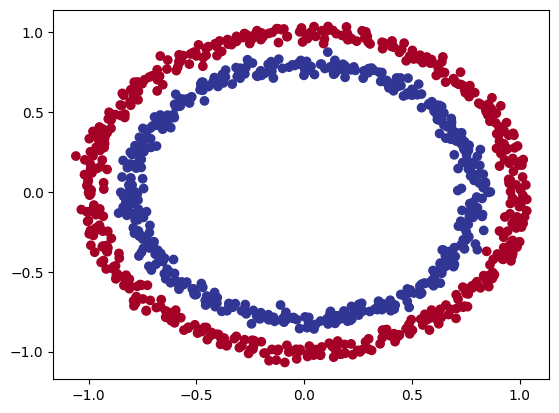

In [6]:
# Let's plot the above data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [7]:
len(X),len(y)

(1000, 1000)

In [8]:
# Let's build a model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]) 

# 2. Compile the model
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# 3. Fit the model
model.fit(X,y,verbose=1,epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 831us/step - loss: 2.5676 - accuracy: 0.4560
Epoch 2/200
32/32 [==============================] - 0s 833us/step - loss: 0.7148 - accuracy: 0.4830
Epoch 3/200
32/32 [==============================] - 0s 682us/step - loss: 0.6947 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 729us/step - loss: 0.6966 - accuracy: 0.4920
Epoch 5/200
32/32 [==============================] - 0s 723us/step - loss: 0.6963 - accuracy: 0.4750
Epoch 6/200
32/32 [==============================] - 0s 715us/step - loss: 0.6975 - accuracy: 0.4590
Epoch 7/200
32/32 [==============================] - 0s 783us/step - loss: 0.6955 - accuracy: 0.5120
Epoch 8/200
32/32 [==============================] - 0s 928us/step - loss: 0.6946 - accuracy: 0.5230
Epoch 9/200
32/32 [==============================] - 0s 851us/step - loss: 0.6998 - accuracy: 0.4890
Epoch 10/200
32/32 [==============================] - 0s 815us/step - loss: 0.6946 - accura

In [9]:
model.evaluate(X,y)

32/32 [==============================] - 0s 613us/step - loss: 0.6937 - accuracy: 0.5000


[0.6937260627746582, 0.5]

In [10]:
import numpy as np

In [11]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicted on X.
    """
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X values(we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing Multiclass Classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())     

313/313 [==============================] - 0s 461us/step
Doing binary classification


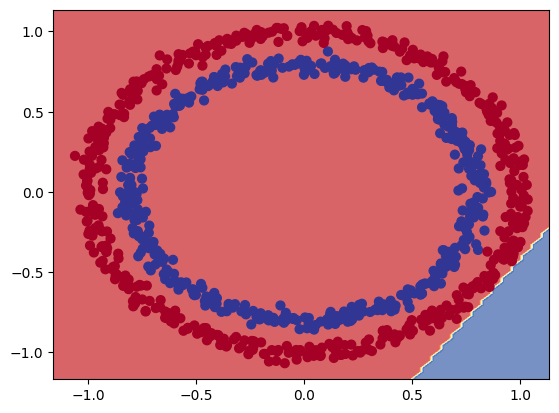

In [13]:
# Check out the predictions our model is making
plot_decision_boundary(model=model,
                       X=X,
                       y=y)

In [15]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

In [16]:
X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [17]:
len(X_regression), len(y_regression)

(200, 200)

In [19]:
# Split our data into training and testing sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
# Fit the model to the regression data
model.fit(X_reg_train, y_reg_train, epochs=100)

Oh wait... we compiled our model for binary classification problem

But... we are now aorking on a regression problem, let's change the model to suit our data 